In [1]:
#installing libraries
import pandas as pd


In [4]:
trxn=pd.read_csv('Retail_Data_Transactions 2.csv')

In [5]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [6]:
responce= pd.read_csv('Retail_Data_Response.csv')

In [7]:
responce

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [8]:
df=trxn.merge(responce, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
#features
df.dtypes
df.shape
df.head
df.tail

<bound method NDFrame.tail of        customer_id trans_date  tran_amount  response
0           CS5295  11-Feb-13           35       1.0
1           CS4768  15-Mar-15           39       1.0
2           CS2122  26-Feb-13           52       0.0
3           CS1217  16-Nov-11           99       0.0
4           CS1850  20-Nov-13           78       0.0
...            ...        ...          ...       ...
124995      CS8433  26-Jun-11           64       0.0
124996      CS7232  19-Aug-14           38       0.0
124997      CS8731  28-Nov-14           42       0.0
124998      CS8133  14-Dec-13           13       0.0
124999      CS7996  13-Dec-14           36       0.0

[125000 rows x 4 columns]>

In [14]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [15]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [18]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [23]:
#change dtypes

df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

In [22]:
set(df['response'])

{0.0, 1.0}

In [24]:
df.dtypes


customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [34]:
#check for outliers
#Z-score

from scipy import stats
import numpy as np

#calc. z score
z_scores= np.abs(stats.zscore(df['tran_amount']))

#set a threshold
threshold=3
outliers= z_scores>threshold

print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: tran_amount, Length: 124969, dtype: bool]


In [39]:
#check for outliers
#Z-score

from scipy import stats
import numpy as np

#calc. z score
z_scores= np.abs(stats.zscore(df['response']))

#set a threshold
threshold=3
outliers= z_scores>threshold

print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: response, Length: 124969, dtype: bool]


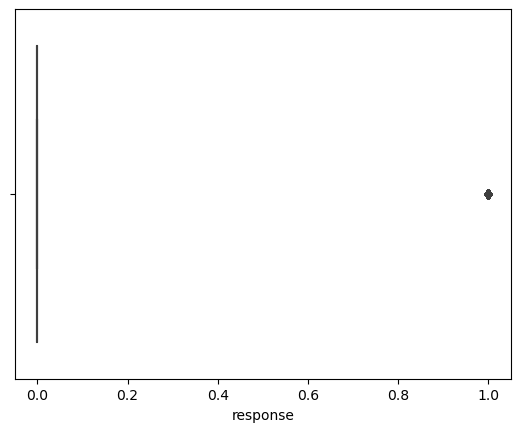

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.boxplot(x=df['response'])
plt.show()

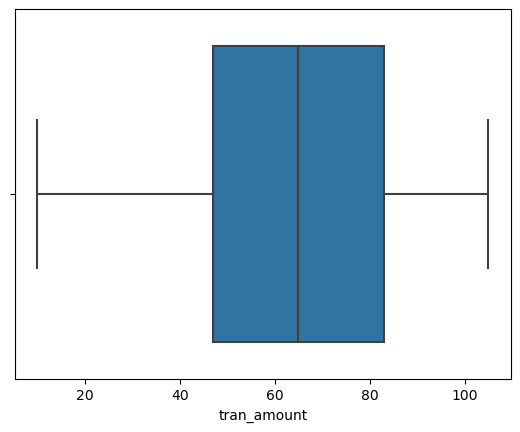

In [41]:
sns.boxplot(x=df['tran_amount'])
plt.show()

In [43]:
#creating new colum
df['month']=df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [45]:
#which 3months have the highest transaction amount

monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


In [46]:
monthly_sales.head(3)

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [54]:
#customers having highest number of orders
customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

In [55]:
#sort
top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<AxesSubplot:xlabel='customer_id', ylabel='count'>

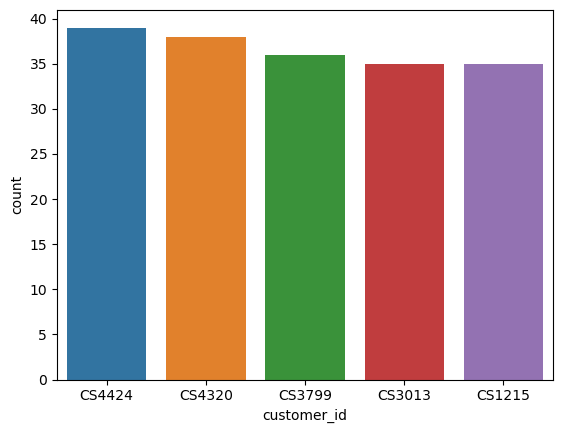

In [56]:
sns.barplot(x='customer_id', y='count', data = top_5_cus)

In [57]:
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [58]:
top_5_sales= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<AxesSubplot:xlabel='customer_id', ylabel='tran_amount'>

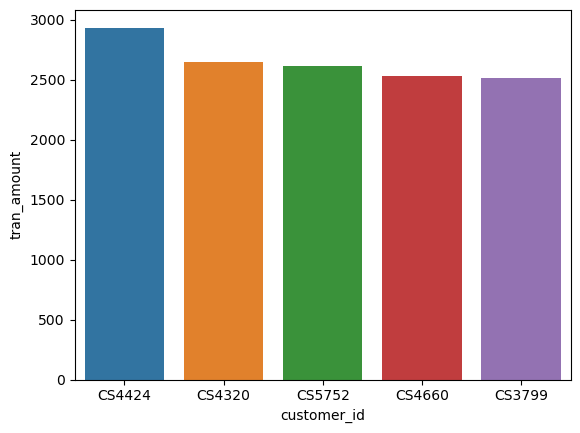

In [59]:
sns.barplot(x='customer_id', y='tran_amount', data = top_5_sales)

# Advanced Analytics

# time series analysis

In [64]:
import matplotlib.dates as mdates

df['months_year']=df['trans_date'].dt.to_period('M')
df

,customer_id,trans_date,tran_amount,response,month,months_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [65]:
monthly_sales=df.groupby('months_year')['tran_amount'].sum()
type(monthly_sales.index)


pandas.core.indexes.period.PeriodIndex

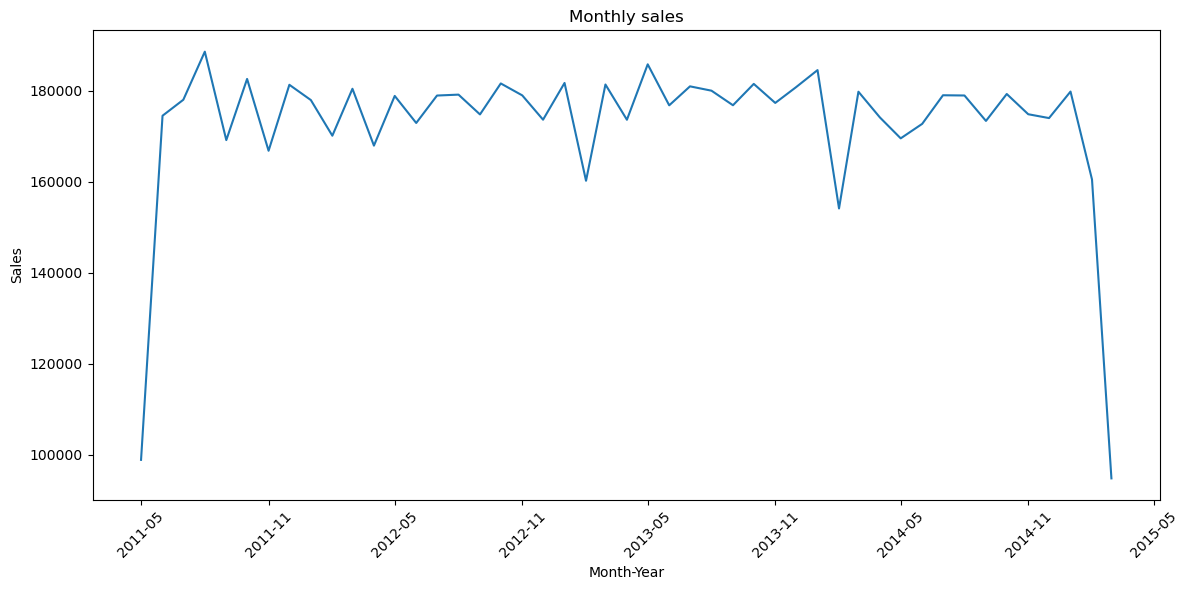

In [81]:
monthly_sales.index = pd.to_datetime(monthly_sales.index)
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# cohort segmentation

In [93]:
# Recency
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency
frequency = df.groupby('customer_id').size()  # Using size() for count of transactions

# Monetary
monetary = df.groupby('customer_id')['tran_amount'].sum()  # Assuming 'amount' represents the transaction amount

# Combine
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})


In [94]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [97]:
#customer segmentaion

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return'P0'
    elif(2011<row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return'P1'
    else:
        return 'P2'
    
rfm['segment']=rfm.apply(segment_customer, axis=1)

In [98]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


# churn analysis

<AxesSubplot:>

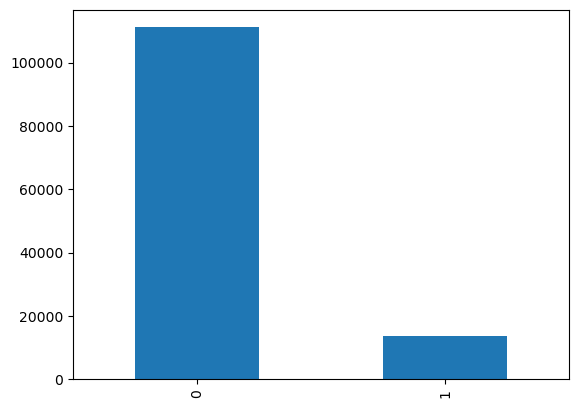

In [100]:
#count the number of charned and active customers
churn_counts=df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')

# analyzing top customers

<AxesSubplot:xlabel='months_year'>

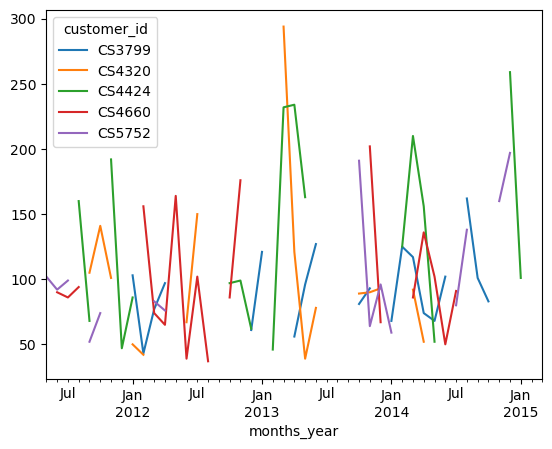

In [103]:
top_5_cus=monetary.sort_values(ascending=False).head(5).index

top_customer_df=df[df['customer_id'].isin(top_5_cus)]

top_customer_sales=top_customer_df.groupby(['customer_id','months_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [104]:
df

,customer_id,trans_date,tran_amount,response,month,months_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [105]:
df.to_csv('MainData.csv')

In [106]:
rfm.to_csv('AddAnalysis.csv')